In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import matplotlib.ticker as mtick
from numpy import argmax
from numpy import sqrt
plt.style.use('ggplot')
%matplotlib inline
from sklearn import linear_model

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import log_loss

In [2]:
df = pd.read_csv('telco2numcat_filter.csv')

In [3]:
df.head(10)

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,PaperlessBilling,OnlineSecurity_No,Contract_One year,Contract_Two year,PaymentMethod_EC,Churn
0,1,29.85,29.850000,0,0,0,0,1,0,0,1,0
1,34,56.95,1889.500000,0,1,0,1,0,1,0,0,0
2,2,53.85,108.150002,0,1,0,0,0,0,0,0,1
3,45,42.30,1840.750000,0,1,0,1,0,1,0,0,0
4,2,70.70,151.649994,0,1,0,0,1,0,0,1,1
5,8,99.65,820.500000,0,1,0,0,1,0,0,1,1
6,22,89.10,1949.400024,0,1,1,0,1,0,0,0,0
7,10,29.75,301.899994,0,1,0,1,0,0,0,0,0
8,28,104.80,3046.050049,0,0,0,0,1,0,0,1,1
9,62,56.15,3487.949951,0,1,1,1,0,1,0,0,0


In [4]:
X, y = df.drop('Churn',axis=1), df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

In [5]:
X.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Partner',
       'Dependents', 'PaperlessBilling', 'OnlineSecurity_No',
       'Contract_One year', 'Contract_Two year', 'PaymentMethod_EC'],
      dtype='object')

In [6]:
# Create logistic regression
logistic = linear_model.LogisticRegression(max_iter = 1000)

# Create regularization penalty space
penalty = ['l1', 'l2']
solver = ['liblinear','lbfgs']
# Create regularization hyperparameter space
C_log = np.logspace(0, 10, 100)

# Create hyperparameter options
hyperparameters_log = dict(C=C_log, penalty=penalty,solver = solver)

In [7]:
# Create grid search using 10-fold cross validation
grid_logistic = GridSearchCV(logistic, hyperparameters_log, cv=10, verbose=0, )

# Fit grid search
grid_logistic.fit(X_train, y_train)

C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Esti

C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Esti

C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Esti

C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Esti

C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Esti

C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Esti

C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Esti

C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Esti

C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Esti

C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\LSY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\LSY\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Esti

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e+00, 1.26185688e+00, 1.59228279e+00, 2.00923300e+00,
       2.53536449e+00, 3.19926714e+00, 4.03701726e+00, 5.09413801e+00,
       6.42807312e+00, 8.11130831e+00, 1.02353102e+01, 1.29154967e+01,
       1.62975083e+01, 2.05651231e+01, 2.59502421e+01, 3.27454916e+01,
       4.13201240e+01, 5.2140082...
       1.20450354e+08, 1.51991108e+08, 1.91791026e+08, 2.42012826e+08,
       3.05385551e+08, 3.85352859e+08, 4.86260158e+08, 6.13590727e+08,
       7.74263683e+08, 9.77009957e+08, 1.23284674e+09, 1.55567614e+09,
       1.96304065e+09, 2.47707636e+09, 3.12571585e+09, 3.94420606e+09,
       4.97702356e+09, 6.28029144e+09, 7.92482898e+09, 1.00000000e+10]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']})

In [8]:
grid_logistic.best_params_

{'C': 5.094138014816379, 'penalty': 'l2', 'solver': 'lbfgs'}

In [9]:
gridlogpredict = grid_logistic.predict(X_test)
print(classification_report(y_test,gridlogpredict))
print(confusion_matrix(y_test, gridlogpredict))
roc_auc_score(y_test, gridlogpredict)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1573
           1       0.61      0.55      0.58       540

    accuracy                           0.80      2113
   macro avg       0.73      0.72      0.72      2113
weighted avg       0.79      0.80      0.79      2113

[[1383  190]
 [ 241  299]]


0.7164577005486097

In [71]:
bestlogistic = LogisticRegression(C=5.094138014816379, penalty='l2', max_iter=1000,solver = 'lbfgs' )  #Model the logistic classifier with the best parameters 
bestlogistic.fit(X_train, y_train)
bestlogisticpredict = bestlogistic.predict(X_test)

print(classification_report(y_test,bestlogisticpredict))
print(confusion_matrix(y_test, bestlogisticpredict))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1573
           1       0.61      0.55      0.58       540

    accuracy                           0.80      2113
   macro avg       0.73      0.72      0.72      2113
weighted avg       0.79      0.80      0.79      2113

[[1383  190]
 [ 241  299]]


In [11]:
probability_class_1 = grid_logistic.predict_proba(X_test)[:, 1]  
#lists the probabilities that the X_test values will lead to churn =1 

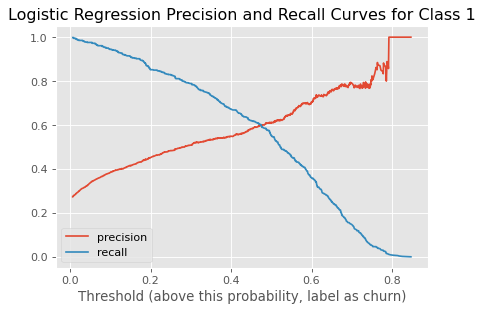

In [12]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, probability_class_1)

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as churn)');
plt.title('Logistic Regression Precision and Recall Curves for Class 1');

In [13]:
lr_precision, lr_recall, thresholds = precision_recall_curve(y_test, probability_class_1) 
lr_f1, lr_auc = f1_score(y_test, gridlogpredict), auc(lr_recall, lr_precision)

Logistic: f1=0.581 auc=0.628


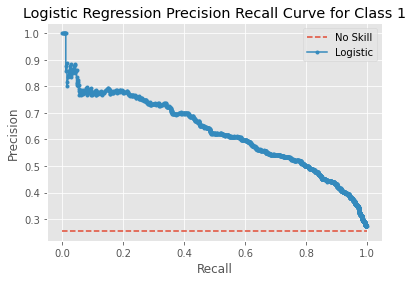

In [14]:
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
#confusion_matrix(y_test, probability_class_1)  (cant output matrix since data is continuous)

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
pyplot.title('Logistic Regression Precision Recall Curve for Class 1')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


In [15]:
#adjusts threshold , t.

def adjusted_classes(probability_class_1, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in probability_class_1]   
   

In [80]:
def precision_recall_threshold(r, p, thresholds, t):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(probability_class_1, t)
    
    print (pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred no churn', 'pred churn'], 
                       index=['no churn', 'churn']))
    print(classification_report(y_test,y_pred_adj))
    print(classification_report(y_test,gridlogpredict))
    print(confusion_matrix(y_test, y_pred_adj))
    print(confusion_matrix(y_test, gridlogpredict))
          
    # plot the curve
    # plot the precision-recall curves
    no_skill = len(y_test[y_test==1]) / len(y_test)
    #pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
    pyplot.title('Logistic Regression Precision Recall Curve for Class 1')
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()
    # plot the current threshold on the line
    point = np.argmin(np.abs(thresholds - t))  
    #Creates an array of absolute difference between all thresholds and the chosen threhold limit
    #and return index of the min absolute difference.
    pyplot.plot(r[point],p[point], '^', c='k',markersize=10)
    
    point = np.argmin(np.abs(thresholds - 0.5))  
    #Creates an array of absolute difference between all thresholds and the chosen threhold limit
    #and return index of the min absolute difference.
    pyplot.plot(r[point],p[point], '^', c='b',markersize=10)
    # show the plot
    pyplot.show()
    

          pred no churn  pred churn
no churn           1184         389
churn               119         421
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1573
           1       0.52      0.78      0.62       540

    accuracy                           0.76      2113
   macro avg       0.71      0.77      0.72      2113
weighted avg       0.81      0.76      0.77      2113

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1573
           1       0.61      0.55      0.58       540

    accuracy                           0.80      2113
   macro avg       0.73      0.72      0.72      2113
weighted avg       0.79      0.80      0.79      2113

[[1184  389]
 [ 119  421]]
[[1383  190]
 [ 241  299]]


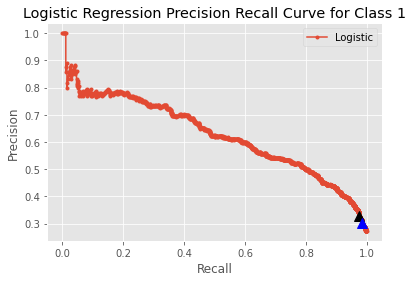

In [81]:
 precision_recall_threshold(lr_recall, lr_precision, thresholds, t = 0.310307)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.838


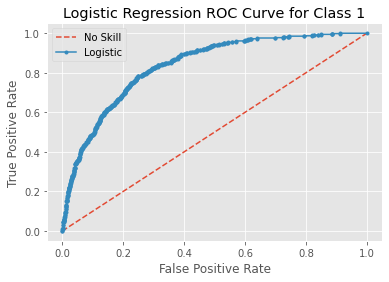

In [18]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_roc_auc = roc_auc_score(y_test, probability_class_1)  
#use the roc_auc_score() function to calculate the true-positive rate and false-positive rate for the predictions 
#using a set of thresholds that can then be used to create a ROC Curve plot.

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_roc_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, probability_class_1)


# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')


pyplot.title('Logistic Regression ROC Curve for Class 1');
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [19]:
#find the best threshold

In [20]:
#find best threshold using fmax (precision and recall curve)

lr_precision, lr_recall, thresholds = precision_recall_curve(y_test, probability_class_1) 
# convert to f score
fscore = (2 * lr_precision * lr_recall) / (lr_precision + lr_recall)
# locate the index of the largest f score
index_maxf = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[index_maxf], fscore[index_maxf]))

Best Threshold=0.310307, F-Score=0.625


In [21]:
# find best threshold using Youden’s J statistic

# calculate roc curves
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, probability_class_1)
# get the best threshold
J = lr_tpr - lr_fpr
index_maxtprfpr = argmax(J)
best_thresh = thresholds[index_maxtprfpr]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.310307


In [22]:
# find best threshold using G-mean

# calculate the g-mean for each threshold
gmeans = sqrt(lr_tpr * (1-lr_fpr))
# locate the index of the largest g-mean
index_maxGmean = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[index_maxGmean], gmeans[index_maxGmean]))

Best Threshold=0.310307, G-Mean=0.767


In [23]:
print("Log-loss on logit: {:6.4f}".format(log_loss(y_test, probability_class_1)))

Log-loss on logit: 0.4200


In [72]:
Order = list(zip(X.columns, bestlogistic.coef_[0]))
print(Order)

[('tenure', -0.05794549901601829), ('MonthlyCharges', 0.014549738966407575), ('TotalCharges', 0.0002753096298774748), ('SeniorCitizen', 0.24494161676772314), ('Partner', -0.2778512854799808), ('Dependents', -0.2966492969749871), ('PaperlessBilling', -0.3704536410966058), ('OnlineSecurity_No', 0.7448823070198234), ('Contract_One year', -0.7107846467463002), ('Contract_Two year', -1.4846544558389294), ('PaymentMethod_EC', 0.2873195317344288)]


In [73]:
order_df = pd.DataFrame(Order)
order_df = order_df.rename(columns={0: "Features", 1: "Coeff"})
order_df

,Features,Coeff
0,tenure,-0.057945
1,MonthlyCharges,0.014550
2,TotalCharges,0.000275
3,SeniorCitizen,0.244942
4,Partner,-0.277851
5,Dependents,-0.296649
6,PaperlessBilling,-0.370454
7,OnlineSecurity_No,0.744882
8,Contract_One year,-0.710785
9,Contract_Two year,-1.484654


In [74]:
order_sorted = order_df.iloc[order_df['Coeff'].abs().argsort()]
order_sorted = order_sorted.reset_index(drop=True)
order_sorted.set_index('Features')
order_sorted

,Features,Coeff
0,TotalCharges,0.000275
1,MonthlyCharges,0.014550
2,tenure,-0.057945
3,SeniorCitizen,0.244942
4,Partner,-0.277851
5,PaymentMethod_EC,0.287320
6,Dependents,-0.296649
7,PaperlessBilling,-0.370454
8,Contract_One year,-0.710785
9,OnlineSecurity_No,0.744882


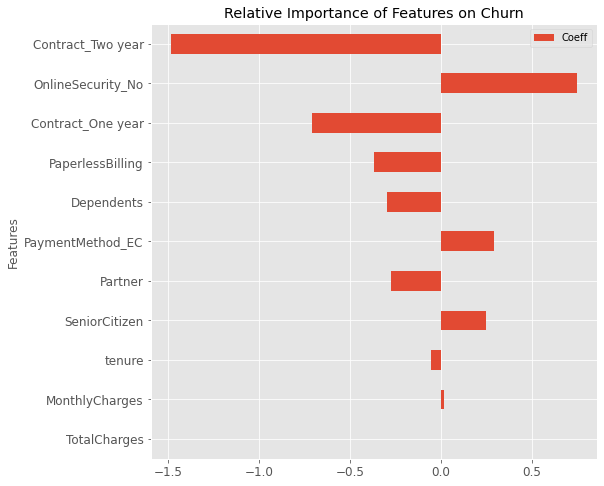

In [75]:
order_sorted.plot.barh(y='Coeff', x='Features',figsize=(8,8),title= 'Relative Importance of Features on Churn',fontsize=12)

In [28]:
#Creates SVC model using GridSearchCV

param_grid = {'C':[1,10],'gamma':[1,0.1], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1, gamma=1, kernel=linear, total= 2.7min
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s


[CV] ...................... C=1, gamma=1, kernel=linear, total= 3.0min
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total= 3.1min
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total= 2.1min
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total= 2.6min
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   1.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   1.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   1.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 63.0min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [1, 0.1],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [29]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [30]:
predic = grid.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1573
           1       0.61      0.46      0.53       540

    accuracy                           0.79      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.77      0.79      0.78      2113

[[1417  156]
 [ 292  248]]


In [31]:
modelbestSVC = svm.SVC(C=1.0, kernel='linear', gamma=1.0, probability = True)  #Model the classifier with the best parameters C=1.0, kernel='linear', gamma='1'
modelbestSVC.fit(X_train, y_train)
predictionbestSVC = modelbestSVC.predict(X_test)

print(classification_report(y_test,predictionbestSVC))
print(confusion_matrix(y_test, predictionbestSVC))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1573
           1       0.61      0.46      0.53       540

    accuracy                           0.79      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.77      0.79      0.78      2113

[[1417  156]
 [ 292  248]]


In [32]:
SVCprobability_class_1 = modelbestSVC.predict_proba(X_test)[:, 1]

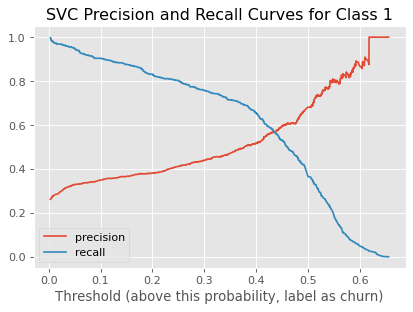

In [33]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 


precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, SVCprobability_class_1)

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as churn)');
plt.title('SVC Precision and Recall Curves for Class 1');

SVC(Linear): f1=0.525 auc=0.604


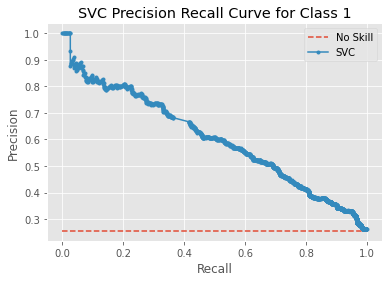

In [34]:
SVC_precision, SVC_recall, _ = precision_recall_curve(y_test, SVCprobability_class_1)
SVC_f1, SVC_auc = f1_score(y_test, predictionbestSVC), auc(SVC_recall, SVC_precision)

# summarize scores
print('SVC(Linear): f1=%.3f auc=%.3f' % (SVC_f1, SVC_auc))

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(SVC_recall, SVC_precision, marker='.', label='SVC')
pyplot.title('SVC Precision Recall Curve for Class 1');
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [35]:
# using the new threshold of 0.4
y_prob_SVC_predict = (SVCprobability_class_1> 0.4)
print("Threshold of 0.4:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_prob_SVC_predict), 
                                                     recall_score(y_test, y_prob_SVC_predict)))

Threshold of 0.4:
Precision: 0.5168,   Recall: 0.6556


No Skill: ROC AUC=0.500
SVC: ROC AUC=0.793


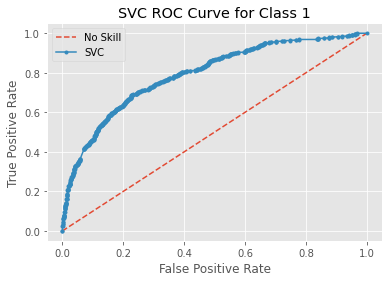

In [36]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
SVC_roc_auc = roc_auc_score(y_test, SVCprobability_class_1)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVC: ROC AUC=%.3f' % (SVC_roc_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
SVC_fpr, SVC_tpr, _ = roc_curve(y_test, SVCprobability_class_1)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(SVC_fpr, SVC_tpr, marker='.', label='SVC')
pyplot.title('SVC ROC Curve for Class 1');
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [37]:
print("Log-loss on SVC: {:6.4f}".format(log_loss(y_test, SVCprobability_class_1)))

Log-loss on SVC: 0.4811


Creates KNN Model

In [38]:
#creates KNN model

knn = KNeighborsClassifier()
k_range = list(range(1, 31))
hyperparameters_knn = dict(n_neighbors=k_range)

grid_knn = GridSearchCV(knn, hyperparameters_knn, cv=10)

# Fit grid search
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]})

In [39]:
grid_knn.best_params_

{'n_neighbors': 15}

In [40]:
grid_knn_predict = grid_knn.predict(X_test)
print(classification_report(y_test,grid_knn_predict))
print(confusion_matrix(y_test, grid_knn_predict))
roc_auc_score(y_test, grid_knn_predict)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1573
           1       0.60      0.44      0.51       540

    accuracy                           0.78      2113
   macro avg       0.71      0.67      0.68      2113
weighted avg       0.77      0.78      0.77      2113

[[1415  158]
 [ 303  237]]


0.6692219396764851

In [41]:
knnprobability_class_1 = grid_knn.predict_proba(X_test)[:, 1]

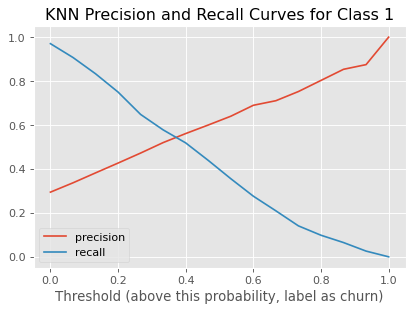

In [42]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 


precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, knnprobability_class_1)

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as churn)');
plt.title('KNN Precision and Recall Curves for Class 1');

knn: f1=0.507 auc=0.567


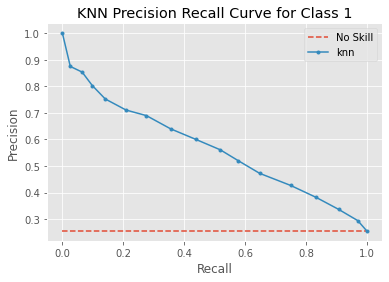

In [43]:
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knnprobability_class_1)
knn_f1, knn_auc = f1_score(y_test, grid_knn_predict), auc(knn_recall, knn_precision)

# summarize scores
print('knn: f1=%.3f auc=%.3f' % (knn_f1, knn_auc))

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(knn_recall, knn_precision, marker='.', label='knn')
pyplot.title('KNN Precision Recall Curve for Class 1');
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


In [44]:
# using the new threshold of 0.4
y_prob_knn_predict = (knnprobability_class_1> 0.2)
print("Threshold of 0.4:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_prob_knn_predict), 
                                                     recall_score(y_test, y_prob_knn_predict)))

Threshold of 0.4:
Precision: 0.4268,   Recall: 0.7500


No Skill: ROC AUC=0.500
knn: ROC AUC=0.775


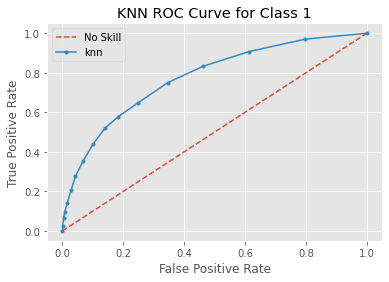

In [45]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
knn_roc_auc = roc_auc_score(y_test, knnprobability_class_1)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('knn: ROC AUC=%.3f' % (knn_roc_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knnprobability_class_1)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='knn')
pyplot.title('KNN ROC Curve for Class 1');
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [46]:
print("Log-loss on knn: {:6.4f}".format(log_loss(y_test, knnprobability_class_1)))

Log-loss on knn: 0.7371


Creates Random Forest Classifier

In [47]:
#creates random forest classifier with GridSearchCV

rfc=RandomForestClassifier()

hyperparameters_rfc = { 
    'n_estimators': [10, 300],
    'max_features': [None, 'sqrt'],
    'max_depth' : [None],
    'criterion' :['gini', 'entropy']
}

grid_rfc = GridSearchCV(estimator=rfc, param_grid=hyperparameters_rfc, cv= 10)
grid_rfc.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [None],
                         'max_features': [None, 'sqrt'],
                         'n_estimators': [10, 300]})

In [48]:
grid_rfc.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [49]:
grid_rfc_predict = grid_rfc.predict(X_test)
print(classification_report(y_test,grid_rfc_predict))
print(confusion_matrix(y_test, grid_rfc_predict))
roc_auc_score(y_test, grid_rfc_predict)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1573
           1       0.59      0.51      0.55       540

    accuracy                           0.78      2113
   macro avg       0.71      0.69      0.70      2113
weighted avg       0.78      0.78      0.78      2113

[[1383  190]
 [ 266  274]]


0.6933095524004615

In [50]:
RFprobability_class_1 = grid_rfc.predict_proba(X_test)[:, 1]

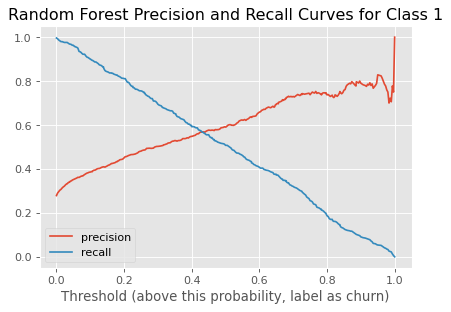

In [51]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 


precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, RFprobability_class_1)

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as churn)');
plt.title('Random Forest Precision and Recall Curves for Class 1');

Random Forest: f1=0.546 auc=0.595


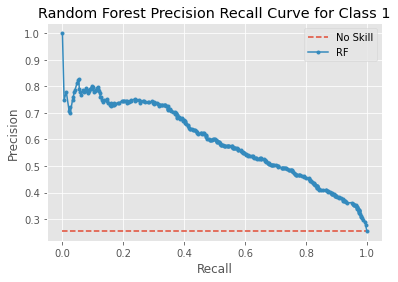

In [52]:
RF_precision, RF_recall, _ = precision_recall_curve(y_test, RFprobability_class_1)
RF_f1, RF_auc = f1_score(y_test, grid_rfc_predict), auc(RF_recall, RF_precision)

# summarize scores
print('Random Forest: f1=%.3f auc=%.3f' % (RF_f1, RF_auc))

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(RF_recall, RF_precision, marker='.', label='RF')
pyplot.title('Random Forest Precision Recall Curve for Class 1');
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


In [53]:
# using the new threshold of 0.4
y_prob_RF_predict = (RFprobability_class_1> 0.4)
print("Threshold of 0.4:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_prob_RF_predict), 
                                                     recall_score(y_test, y_prob_RF_predict)))

Threshold of 0.4:
Precision: 0.5479,   Recall: 0.5926


No Skill: ROC AUC=0.500
RF: ROC AUC=0.815


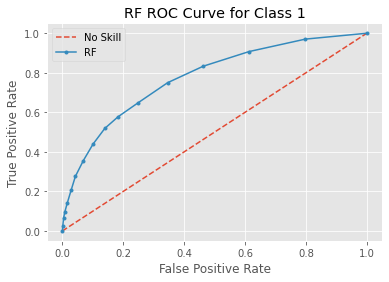

In [54]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
RF_roc_auc = roc_auc_score(y_test, RFprobability_class_1)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('RF: ROC AUC=%.3f' % (RF_roc_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
RF_fpr, RF_tpr, _ = roc_curve(y_test, RFprobability_class_1)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='RF')
pyplot.title('RF ROC Curve for Class 1');
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [55]:
print("Log-loss on RF: {:6.4f}".format(log_loss(y_test, RFprobability_class_1)))

Log-loss on RF: 0.5027


In [56]:
#Creates ROC Comparison

Logistic: ROC AUC=0.838
knn: ROC AUC=0.775
RF: ROC AUC=0.815
SVC: ROC AUC=0.793


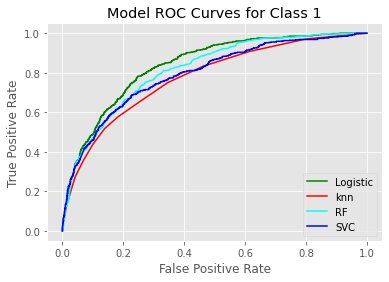

In [57]:
# generate a no skill prediction (majority class)
#ns_probs = [0 for _ in range(len(y_test))]

# calculate scores
#ns_auc = roc_auc_score(y_test, ns_probs)
lr_roc_auc = roc_auc_score(y_test, probability_class_1)
knn_roc_auc = roc_auc_score(y_test, knnprobability_class_1)
RF_roc_auc = roc_auc_score(y_test, RFprobability_class_1)
SVC_roc_auc = roc_auc_score(y_test, SVCprobability_class_1)

# summarize scores
#print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_roc_auc))
print('knn: ROC AUC=%.3f' % (knn_roc_auc))
print('RF: ROC AUC=%.3f' % (RF_roc_auc))
print('SVC: ROC AUC=%.3f' % (SVC_roc_auc))


# calculate roc curves
#ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, probability_class_1)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knnprobability_class_1)
RF_fpr, RF_tpr, _ = roc_curve(y_test, RFprobability_class_1)
SVC_fpr, SVC_tpr, _ = roc_curve(y_test, SVCprobability_class_1)


# plot the roc curve for the model
#pyplot.plot(ns_fpr, ns_tpr, color='yellow', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, color='green', label='Logistic')
pyplot.plot(knn_fpr, knn_tpr, color='red', label='knn')
pyplot.plot(RF_fpr, RF_tpr, color='cyan', label='RF')
pyplot.plot(SVC_fpr, SVC_tpr, color='blue', label='SVC')
pyplot.title('Model ROC Curves for Class 1');


# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


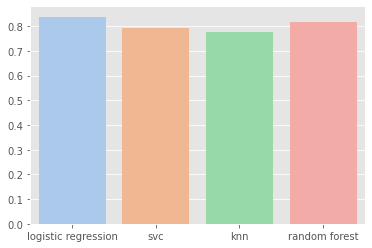

In [64]:
#PLot bar chart comparing the four different models
Model_Type = ['logistic regression', 'svc', 'knn', 'random forest']
AUC_ROC = [0.838, 0.793, 0.775, 0.815]
log_loss= [0.42, 0.4811, 0.7371, 0.5027]
F1 = [0.58, 0.53, 0.51, 0.55]
Precision=[0.61, 0.61, 0.6, 0.59]
Recall=[0.55, 0.46, 0.44, 0.51]

ax = sns.barplot(x=Model_Type, y=AUC_ROC, palette= "pastel")




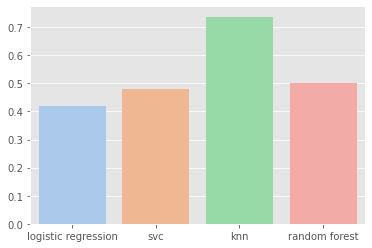

In [65]:
ax = sns.barplot(x=Model_Type, y=log_loss,palette= "pastel")


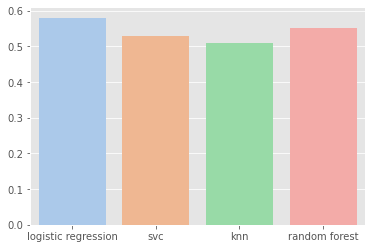

In [66]:
ax = sns.barplot(x=Model_Type, y=F1,palette= "pastel")


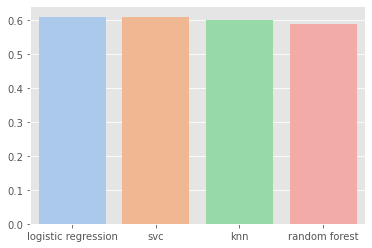

In [67]:
ax = sns.barplot(x=Model_Type, y=Precision,palette= "pastel")


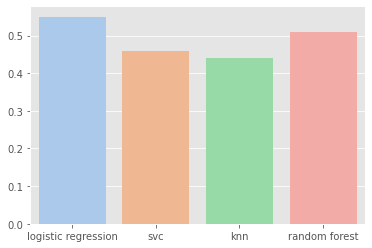

In [68]:
ax = sns.barplot(x=Model_Type, y=Recall,palette= "pastel")